<a href="https://colab.research.google.com/github/fedorst/brain-visualization-utcg2020/blob/main/kym_spotlight_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [ ]:
path = "/content/drive/My Drive/dataEngProject/kym_spotlight.json"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_json(path, orient="index")

In [ ]:
df["url"] = df.index
df = df.reset_index()
df = df.drop(columns=["index"])
df.head()

,@text,@confidence,@support,@types,@sparql,@policy,Resources,url
0,"""This is Relevant To My Interests"" is an expre...",0.5,0,,,whitelist,[{'@URI': 'http://dbpedia.org/resource/Gene_ex...,https://knowyourmeme.com/memes/this-is-relevan...
1,ROFLcopter is an Internet slang term used as a...,0.5,0,,,whitelist,[{'@URI': 'http://dbpedia.org/resource/Interne...,https://knowyourmeme.com/memes/roflcopter
2,Bitches Don't Know is an exploitable image mac...,0.5,0,,,whitelist,[{'@URI': 'http://dbpedia.org/resource/Image_m...,https://knowyourmeme.com/memes/bitches-dont-know
3,"""Leave Britney Alone"" is a viral video in whic...",0.5,0,,,whitelist,[{'@URI': 'http://dbpedia.org/resource/Alone_(...,https://knowyourmeme.com/memes/leave-britney-a...
4,O RLY is internet slang for “OH REALLY?” with ...,0.5,0,,,whitelist,[{'@URI': 'http://dbpedia.org/resource/Interne...,https://knowyourmeme.com/memes/o-rly


In [ ]:
df.iloc[0]["@text"]

'"This is Relevant To My Interests" is an expression used to convey approval and enthusiasm over a given topic. It is most commonly used on media-sharing websites in the form of text-based comments or image macros featuring photographs of concerned-looking animals.'

In [ ]:
df.drop(columns=["@confidence", "@support", "@types", "@sparql", "@policy"], inplace=True)

In [ ]:
df.head()

,@text,Resources,url
0,"""This is Relevant To My Interests"" is an expre...",[{'@URI': 'http://dbpedia.org/resource/Gene_ex...,https://knowyourmeme.com/memes/this-is-relevan...
1,ROFLcopter is an Internet slang term used as a...,[{'@URI': 'http://dbpedia.org/resource/Interne...,https://knowyourmeme.com/memes/roflcopter
2,Bitches Don't Know is an exploitable image mac...,[{'@URI': 'http://dbpedia.org/resource/Image_m...,https://knowyourmeme.com/memes/bitches-dont-know
3,"""Leave Britney Alone"" is a viral video in whic...",[{'@URI': 'http://dbpedia.org/resource/Alone_(...,https://knowyourmeme.com/memes/leave-britney-a...
4,O RLY is internet slang for “OH REALLY?” with ...,[{'@URI': 'http://dbpedia.org/resource/Interne...,https://knowyourmeme.com/memes/o-rly


In [ ]:
df.iloc[3]["@text"]

'"Leave Britney Alone" is a viral video in which YouTube celebrity Chris Crocker cries while pleading with viewers to leave pop star Britney Spears alone.'

In [ ]:
df.iloc[3]["Resources"]

[{'@URI': 'http://dbpedia.org/resource/Alone_(Heart_song)',
  '@offset': '15',
  '@percentageOfSecondRank': '0.40237975532092823',
  '@similarityScore': '0.5952799492675273',
  '@support': '156',
  '@surfaceForm': 'Alone',
  '@types': 'Wikidata:Q386724,Wikidata:Q2188189,Schema:MusicRecording,Schema:CreativeWork,DBpedia:Work,DBpedia:MusicalWork,DBpedia:Song'},
 {'@URI': 'http://dbpedia.org/resource/Viral_video',
  '@offset': '27',
  '@percentageOfSecondRank': '0.0',
  '@similarityScore': '1.0',
  '@support': '1765',
  '@surfaceForm': 'viral video',
  '@types': ''},
 {'@URI': 'http://dbpedia.org/resource/YouTube',
  '@offset': '48',
  '@percentageOfSecondRank': '7.123706014659695E-6',
  '@similarityScore': '0.9999928763420697',
  '@support': '49448',
  '@surfaceForm': 'YouTube',
  '@types': 'Wikidata:Q386724,Schema:WebSite,Schema:CreativeWork,DBpedia:Work,DBpedia:Website'},
 {'@URI': 'http://dbpedia.org/resource/Chris_Crocker',
  '@offset': '66',
  '@percentageOfSecondRank': '1.287635280

In [ ]:
# Resources: @types: unique set of matches' DBpedia and Schema as one hot vectors
# phrase2vec cross-correlations between memes @text


In [ ]:
def getTypeDict(types):
  uniqueTypeList = list(set(j for t in types for j in t.split(",")))
  tDict = {}
  for t in uniqueTypeList:
    if "http:" in t.lower():
      continue 
    key, value = t.split(":")
    if key in tDict:
      tDict[key].append(value)
    else:
      tDict[key] = [value]
  return tDict

def getTypes(row):
  if (pd.isna(row)["Resources"]):
    return row
  types = [x["@types"] for x in row["Resources"] if x["@types"] != ""]
  uniqueTypeList = list(set(j for t in types for j in t.split(",")))
  tDict = getTypeDict(types)
  if "DBpedia" in tDict:
    row["types_DBpedia"] = tDict["DBpedia"]
  if "Schema" in tDict:
    row["types_Schema"] = tDict["Schema"]
  return row

getTypes(df.iloc[3])

@text            "Leave Britney Alone" is a viral video in whic...
Resources        [{'@URI': 'http://dbpedia.org/resource/Alone_(...
url              https://knowyourmeme.com/memes/leave-britney-a...
types_DBpedia    [Song, Agent, MusicGenre, Work, Person, Musica...
types_Schema       [MusicRecording, Person, WebSite, CreativeWork]
Name: 3, dtype: object

In [ ]:
df = df.apply(getTypes, axis=1)
df = df.drop(columns=["Resources"])

In [ ]:
df.head(10)

,@text,types_DBpedia,types_Schema,url
0,"""This is Relevant To My Interests"" is an expre...",NaN,NaN,https://knowyourmeme.com/memes/this-is-relevan...
1,ROFLcopter is an Internet slang term used as a...,NaN,NaN,https://knowyourmeme.com/memes/roflcopter
2,Bitches Don't Know is an exploitable image mac...,"[Software, Work]",[CreativeWork],https://knowyourmeme.com/memes/bitches-dont-know
3,"""Leave Britney Alone"" is a viral video in whic...","[Song, Agent, MusicGenre, Work, Person, Musica...","[MusicRecording, Person, WebSite, CreativeWork]",https://knowyourmeme.com/memes/leave-britney-a...
4,O RLY is internet slang for “OH REALLY?” with ...,NaN,NaN,https://knowyourmeme.com/memes/o-rly
5,"""Yatta!"" is a 2001 parody song by a fictional ...","[Place, Song, ArchitecturalStructure, Work, Lo...","[MusicRecording, CreativeWork, Language, Place]",https://knowyourmeme.com/memes/yatta
6,"In Soviet Russia, also known as the Russian Re...","[Song, Agent, Comedian, Work, Person, MusicalW...","[MusicRecording, Person, CreativeWork]",https://knowyourmeme.com/memes/in-soviet-russia
7,Domo is a Japanese character often pasted in t...,[Language],[Language],https://knowyourmeme.com/memes/domo
8,"""I Like Turtles"" is a phrase first uttered by ...","[Agent, Place, AdministrativeRegion, Location,...","[Event, AdministrativeArea, MusicGroup, Place,...",https://knowyourmeme.com/memes/i-like-turtles
9,Diabeetus is an exploitable soundbite based on...,"[Place, Location, Agent, PopulatedPlace, Disea...","[Person, Country, Place]",https://knowyourmeme.com/memes/diabeetus


In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=8, window=2, min_count=1, workers=4)


In [ ]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!


In [ ]:
model

In [ ]:
def getVector(row):
  words = row["@text"].lower().split(" ")
  words = [''.join(filter(str.isalpha, word)) for word in words]
  vector = model.infer_vector(words)
  row["doc2vec"] = vector
  return row

In [ ]:
df = df.apply(getVector, axis=1)

In [ ]:
vec1 = df.iloc[3]["doc2vec"]
vec2 = df.iloc[4]["doc2vec"]
print(vec1, vec2)
dist = np.linalg.norm(vec1-vec2)
print(dist)

[ 0.08039264  0.07167017 -0.02908351 -0.03511304  0.09431612] [ 0.09286018  0.02714852  0.08155558 -0.09250014 -0.03469218]
0.1852432


In [ ]:
vector_series = df["doc2vec"]

In [ ]:
def distFun(vec1, vec2):
  return np.linalg.norm(vec1-vec2)

In [ ]:
from itertools import combinations

In [ ]:
combs = list(combinations(df.index.tolist(),2))

In [ ]:
mat = np.zeros((df.index.size, df.index.size))

In [ ]:
for comb in combinations(df.index.tolist(),2):
  mat[comb[0], comb[1]] = distFun(df.loc[comb[0],"doc2vec"], df.loc[comb[1], "doc2vec"])

In [ ]:
import seaborn as sns

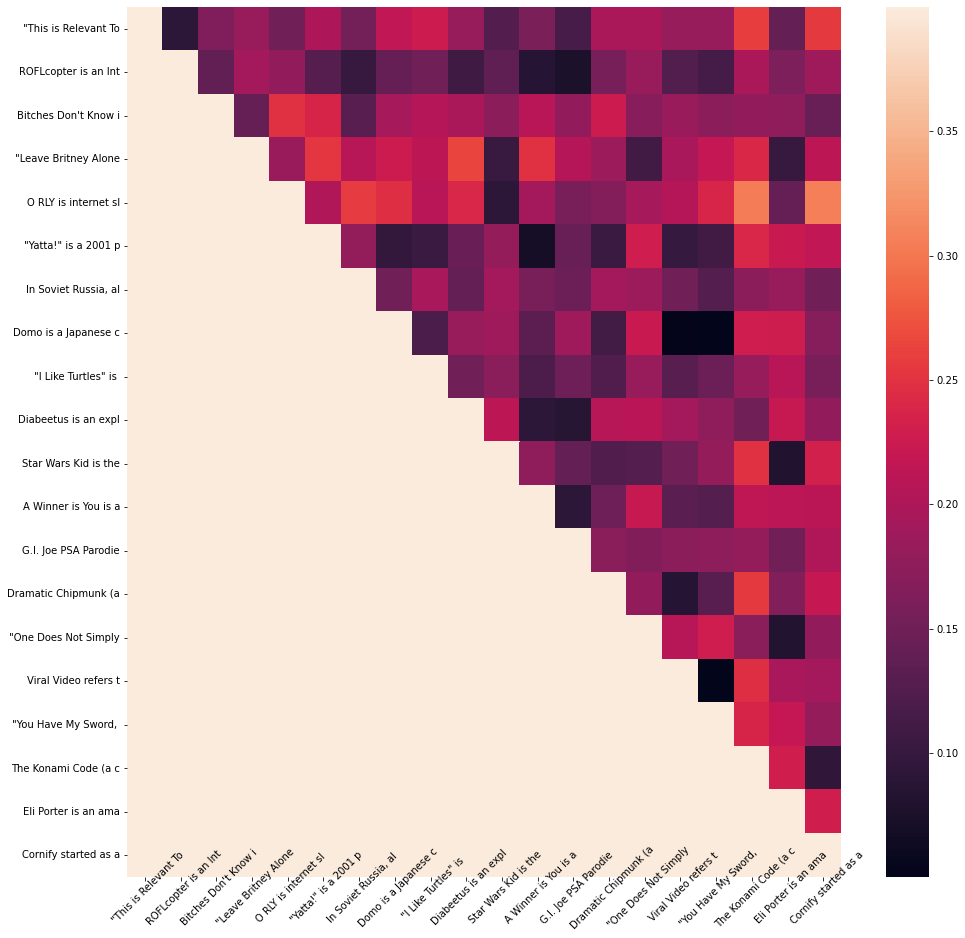

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)
newmat = np.where(mat == 0, mat.max(), mat)
sns.heatmap(newmat[:20, :20])
plt.xticks(np.arange(0.5, 20.5, 1), [x[:20] for x in df.loc[:20,"@text"]], rotation=45, rotation_mode="anchor")
plt.yticks(np.arange(0.5, 20.5, 1), [x[:20] for x in df.loc[:20,"@text"]], rotation=0)
plt.show()

In [ ]:
minidx1, minidx2 = np.unravel_index(np.argmin(newmat), newmat.shape)
print("Minimum distance:", newmat.min())

Minimum distance: 0.004370582289993763


In [ ]:
maxidx1, maxidx2 = np.unravel_index(np.argmax(mat), mat.shape)
print("Maximum distance:", mat.max())

Maximum distance: 0.3999771773815155


In [ ]:
print(df.loc[minidx1, "@text"], "\n", df.loc[minidx2, "@text"])

Life Hacks are tricks, skills or shortcuts that are meant to increase a person's productivity or efficiency in their everyday lives. 
 Jasper Falling is a popular video remixes of the character Jasper from _Steven Universe falling into a crack.


In [ ]:
print(df.loc[maxidx1, "@text"], "\n", df.loc[maxidx2, "@text"])

Beyonce Reading Menu refers to a series of image macros using a photo from singer Beyonce's Instagram of her reading off a restaurant menu to a server. The meme became popular on Twitter, where people captioned what they imagined Beyonce said to the server. 
 "Ramirez, Do Everything!" is a catchphrase and image macro series referencing a character from the first-person shooter video game Call of Duty: Modern Warfare 2. Image macros typically feature a centered picture of Sergeant Foley, a non-playable character in the game, with the word "RAMIREZ!" on the top line, and an order of some kind on the bottom line.


In [ ]:
df.to_parquet("/content/drive/My Drive/dataEngProject/kym_spotlight_processed.parquet")